Using dataset: c:\Users\mackrish_malik\Desktop\clinical-insights-assistant\data\clinical_trial_data.csv
✅ Dataset loaded successfully!
Shape: (6000, 9)

Columns: ['patient_id', 'trial_day', 'dosage_mg', 'compliance_pct', 'adverse_event_flag', 'doctor_notes', 'outcome_score', 'cohort', 'visit_date']

Missing values:
 patient_id            0
trial_day             0
dosage_mg             0
compliance_pct        0
adverse_event_flag    0
doctor_notes          0
outcome_score         0
cohort                0
visit_date            0
dtype: int64

Summary statistics:
        patient_id    trial_day    dosage_mg  compliance_pct  \
count        6000  6000.000000  6000.000000     6000.000000   
unique        200          NaN          NaN             NaN   
top          P001          NaN          NaN             NaN   
freq           30          NaN          NaN             NaN   
mean          NaN    15.500000    75.016667       89.271120   
min           NaN     1.000000    50.000000       50.

,patient_id,trial_day,dosage_mg,compliance_pct,adverse_event_flag,doctor_notes,outcome_score,cohort,visit_date
0,P001,1,50,95.437432,0,"Patient stable, no complaints.",78.554081,A,2024-01-01
1,P001,2,100,100.000000,0,"Adverse reaction observed, dosage adjustment n...",96.837174,A,2024-01-02
2,P001,3,75,84.191219,0,"Patient stable, no complaints.",80.631517,A,2024-01-03
3,P001,4,75,65.608942,0,"Adverse reaction observed, dosage adjustment n...",80.699889,A,2024-01-04
4,P001,5,100,100.000000,0,"Mild headache reported, advised rest.",91.871118,A,2024-01-05
5,P001,6,50,91.222192,0,"Patient stable, no complaints.",77.789479,A,2024-01-06
6,P001,7,50,83.993613,0,"Patient stable, no complaints.",76.739615,A,2024-01-07
7,P001,8,100,100.000000,0,"Patient stable, no complaints.",94.865595,A,2024-01-08
8,P001,9,75,77.348809,0,"Mild headache reported, advised rest.",86.664604,A,2024-01-09
9,P001,10,75,68.216658,1,"Fatigue noted, monitoring ongoing.",58.245515,A,2024-01-10


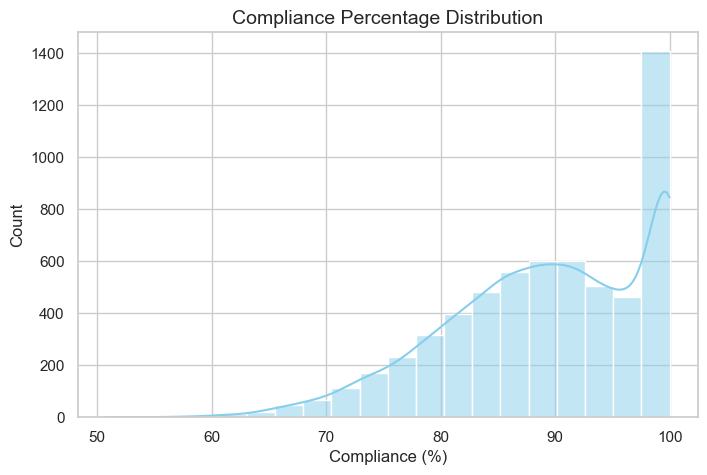

C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_24640\3141197064.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="dosage_mg", y="outcome_score", data=df, palette="pastel")


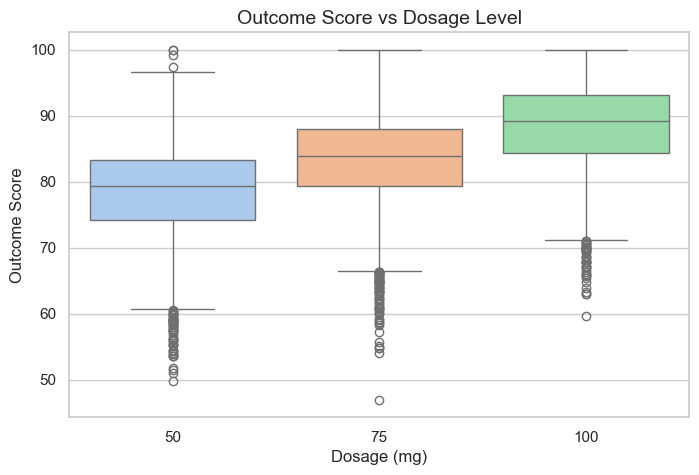

C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_24640\3141197064.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette=["#6CC644", "#FF6961"])


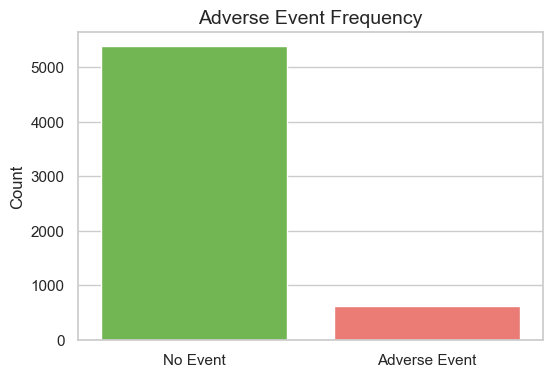

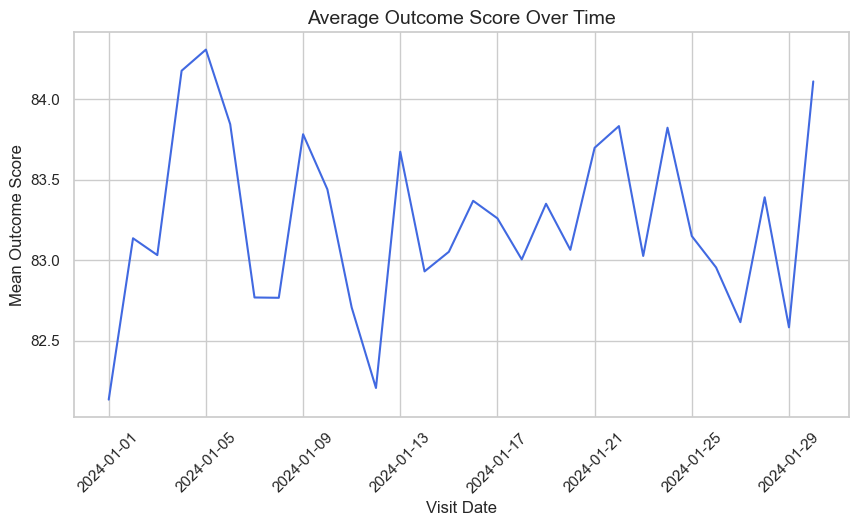

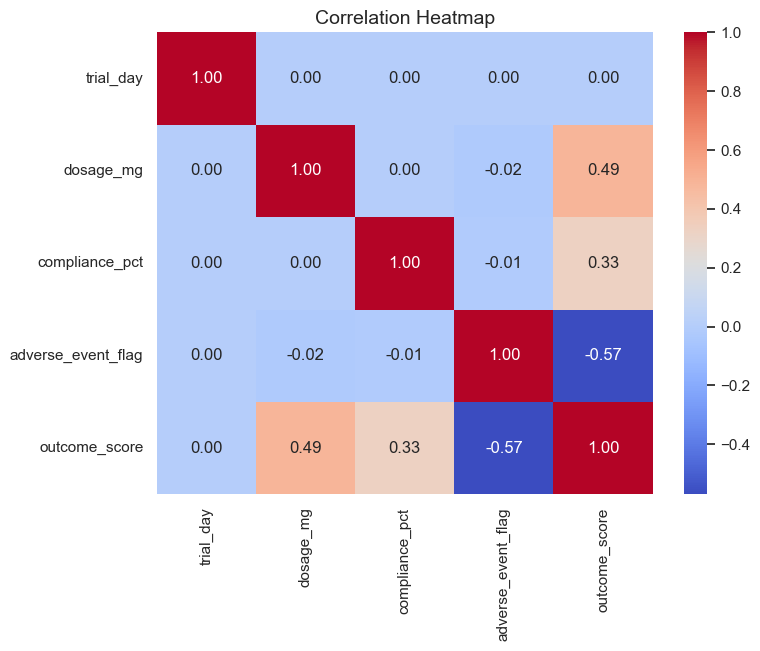

C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_24640\3141197064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cohort", y="outcome_score", data=df, palette="Set2")


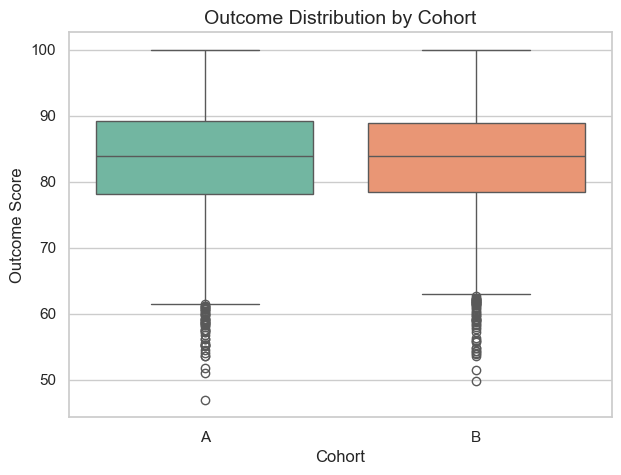

✅ EDA completed successfully!
Insights generated:
- Compliance variation
- Dosage vs outcome relationship
- Adverse event frequencies
- Outcome trend over time
- Feature correlations
- Cohort comparison


In [3]:
"""
Capstone 3 - Clinical Insights Assistant
Notebook: 01_data_ingestion_and_eda.ipynb
------------------------------------------
Performs exploratory data analysis (EDA):
- Load clinical dataset
- Inspect structure, stats, and missing values
- Visualize compliance, outcomes, adverse events
- Correlation and cohort-level trends
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# ------------------- CONFIG -------------------

# ✅ Universal data path (works in notebooks & scripts)
project_root = os.getcwd()
if "notebooks" in project_root:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "../data/clinical_trial_data.csv"))
else:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "data/clinical_trial_data.csv"))

print("Using dataset:", DATA_PATH)

# ------------------- LOAD DATA -------------------
df = pd.read_csv(DATA_PATH, parse_dates=["visit_date"])
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# ------------------- BASIC STATS -------------------
print("\nSummary statistics:\n", df.describe(include="all"))

# Show first few rows
display(df.head(10))

# ------------------- VISUAL 1: Compliance Distribution -------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["compliance_pct"], bins=20, kde=True, color="skyblue")
plt.title("Compliance Percentage Distribution", fontsize=14)
plt.xlabel("Compliance (%)")
plt.ylabel("Count")
plt.show()

# ------------------- VISUAL 2: Outcome vs Dosage -------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="dosage_mg", y="outcome_score", data=df, palette="pastel")
plt.title("Outcome Score vs Dosage Level", fontsize=14)
plt.xlabel("Dosage (mg)")
plt.ylabel("Outcome Score")
plt.show()

# ------------------- VISUAL 3: Adverse Event Frequency -------------------
plt.figure(figsize=(6, 4))
event_counts = df["adverse_event_flag"].value_counts().rename({0: "No Event", 1: "Adverse Event"})
sns.barplot(x=event_counts.index, y=event_counts.values, palette=["#6CC644", "#FF6961"])
plt.title("Adverse Event Frequency", fontsize=14)
plt.ylabel("Count")
plt.xlabel("")
plt.show()

# ------------------- VISUAL 4: Outcome Trend Over Time -------------------
plt.figure(figsize=(10, 5))
daily_avg = df.groupby("visit_date")["outcome_score"].mean().reset_index()
sns.lineplot(x="visit_date", y="outcome_score", data=daily_avg, color="royalblue")
plt.title("Average Outcome Score Over Time", fontsize=14)
plt.xlabel("Visit Date")
plt.ylabel("Mean Outcome Score")
plt.xticks(rotation=45)
plt.show()

# ------------------- VISUAL 5: Correlation Heatmap -------------------
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# ------------------- VISUAL 6: Cohort-wise Outcome Comparison -------------------
if "cohort" in df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="cohort", y="outcome_score", data=df, palette="Set2")
    plt.title("Outcome Distribution by Cohort", fontsize=14)
    plt.xlabel("Cohort")
    plt.ylabel("Outcome Score")
    plt.show()
else:
    print("No 'cohort' column found in dataset.")

# ------------------- WRAP-UP -------------------
print("✅ EDA completed successfully!")
print("Insights generated:")
print("- Compliance variation")
print("- Dosage vs outcome relationship")
print("- Adverse event frequencies")
print("- Outcome trend over time")
print("- Feature correlations")
print("- Cohort comparison")
